In [3]:
import pandas as pd
import folium
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import re
%matplotlib inline

In [29]:
import os

def ensure_dir_exists(directory):
    """
    Create a directory if it doesn't exist
    """
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")

def save_to_question_dir(filename, question_num, *args, **kwargs):
    """
    Save a file to the specified question directory, creating it if necessary
    """
    dir_name = f'q{question_num}'
    ensure_dir_exists(dir_name)
    filepath = os.path.join(dir_name, filename)
    plt.savefig(filepath, *args, **kwargs)
    print(f"Saved {filename} to {filepath}")

In [17]:
data = pd.read_csv('properties.csv', low_memory=False)

In [18]:
for col in data.columns:
    print(f"Column '{col}': {data[col].dtype}")

Column 'ID': int64
Column 'Possession Status': object
Column 'Availability Starts From': object
Column 'Floor No': object
Column 'Commercial': object
Column 'Developer': object
Column 'Approved Authority Name': object
Column 'Units Available': float64
Column 'Price': float64
Column 'Price (English)': object
Column 'Flooring Type': object
Column 'Electricity Status': object
Column 'Maintenance Type': object
Column 'Maintenance Charges': float64
Column 'Booking Amount': float64
Column 'Landmark': object
Column 'Covered Area': float64
Column 'Project Name': object
Column 'sqft Price ': float64
Column 'Carpet Area': float64
Column 'Area Name': object
Column 'Property Uniqueness': object
Column 'Unit of Carpet Area': object
Column 'Society': object
Column 'Ownership Type': object
Column 'furnished Type': object
Column 'Bathroom': float64
Column 'Parking': object
Column 'Facing': object
Column 'Amenities Facing': object
Column 'Transaction Type': object
Column 'Floor Data': object
Column 'Ty

#### 1) As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities. (5 Marks)

In [26]:
percentiles = [25, 75]
percentile_values = data['Price'].quantile([p / 100 for p in percentiles])

def categorize_price_percentile(price):
    if price <= percentile_values.iloc[0]:
        return 'Low'
    elif price <= percentile_values.iloc[1] and price > percentile_values.iloc[0]:
        return 'Medium'
    else:
        return 'High'

data['Budget_Category'] = data['Price'].apply(categorize_price_percentile)
data['Price_Category'] = data['Price'].apply(categorize_price_percentile)
budget_distribution = data['Budget_Category'].value_counts()

Saved bar_budget_thane.jpg to q1/bar_budget_thane.jpg


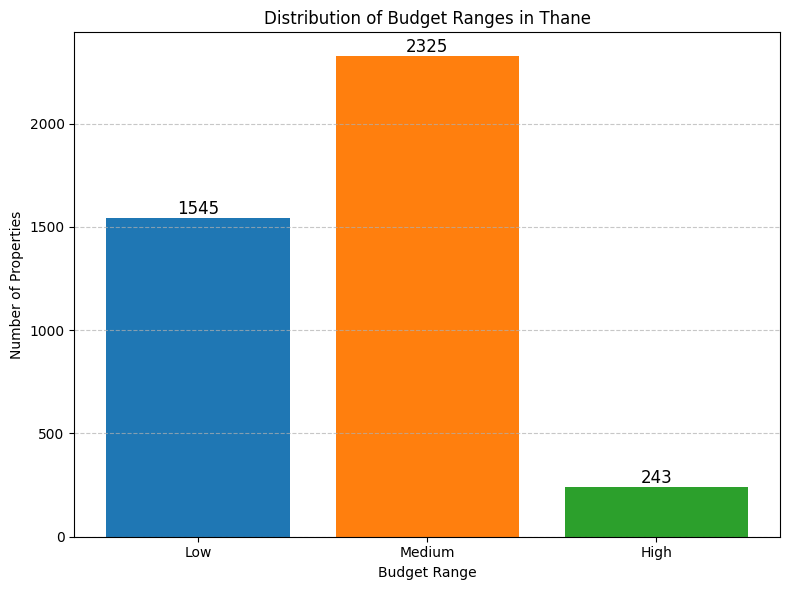

Saved bar_budget_kalyan.jpg to q1/bar_budget_kalyan.jpg


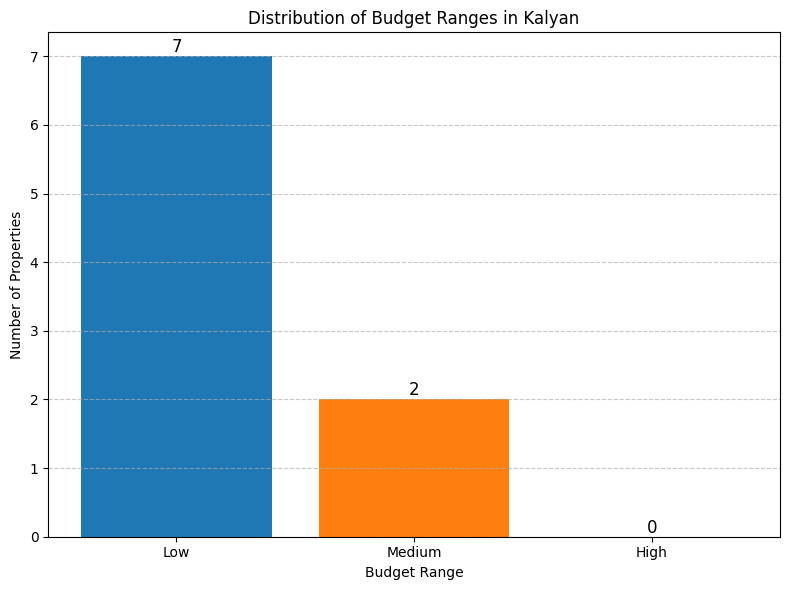

Saved bar_budget_mumbai.jpg to q1/bar_budget_mumbai.jpg


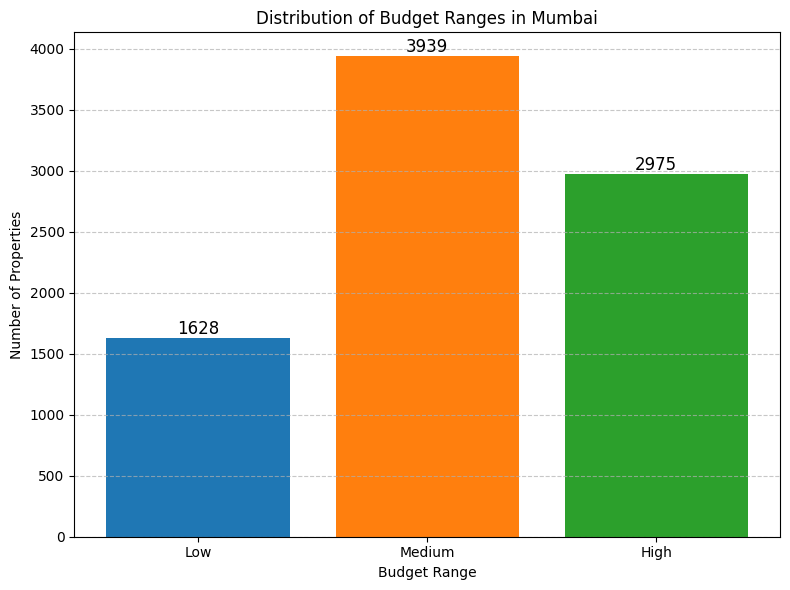

Saved bar_budget_agartala.jpg to q1/bar_budget_agartala.jpg


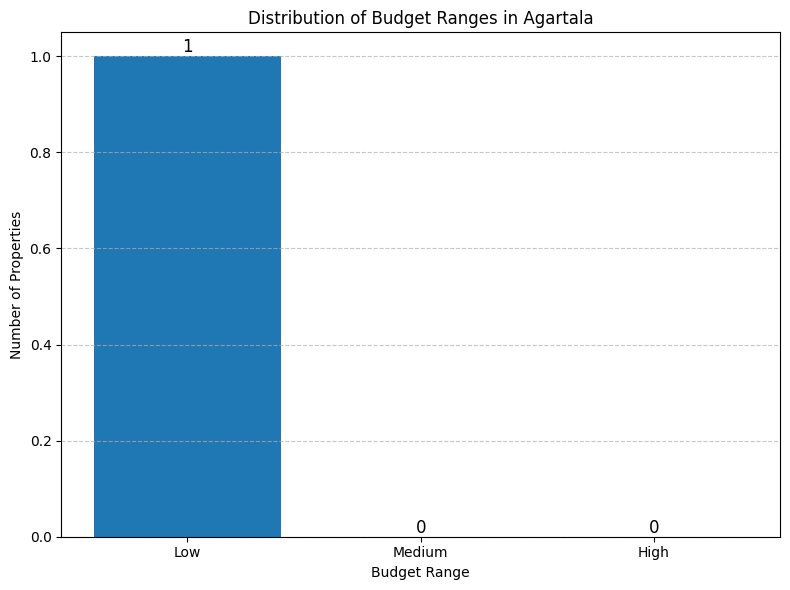

Saved bar_budget_palghar.jpg to q1/bar_budget_palghar.jpg


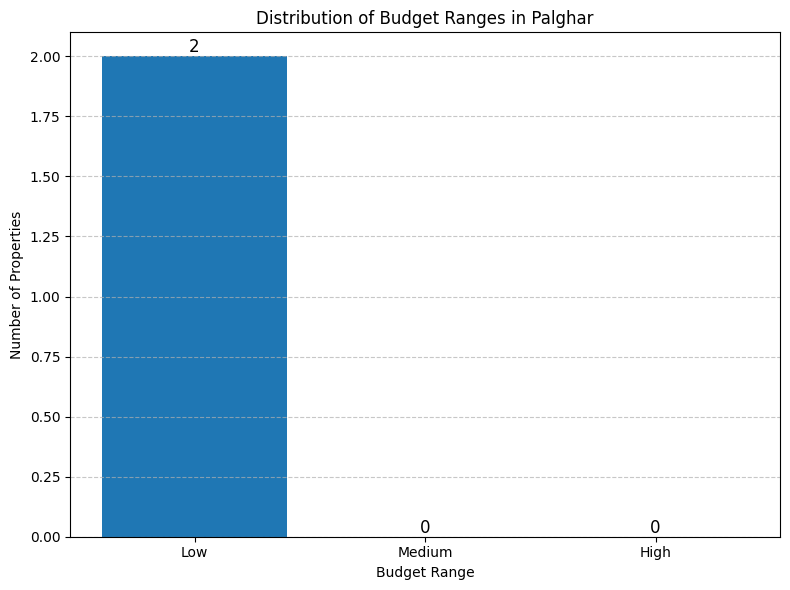

Saved bar_budget_bhiwandi.jpg to q1/bar_budget_bhiwandi.jpg


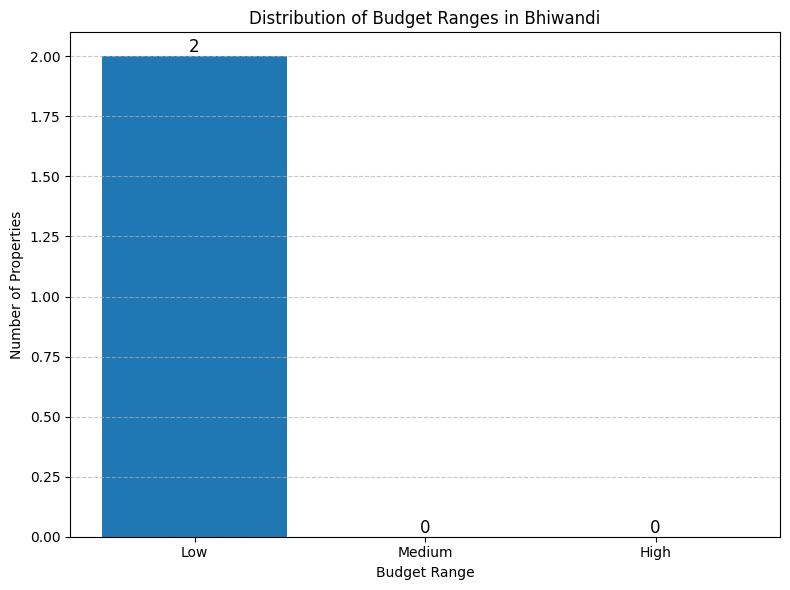

Saved bar_budget_gurgaon.jpg to q1/bar_budget_gurgaon.jpg


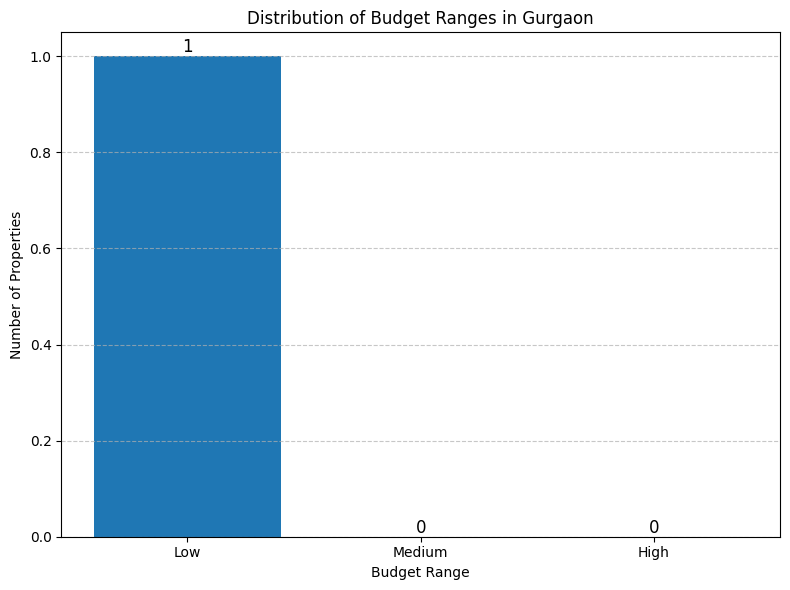

Saved bar_budget_hyderabad.jpg to q1/bar_budget_hyderabad.jpg


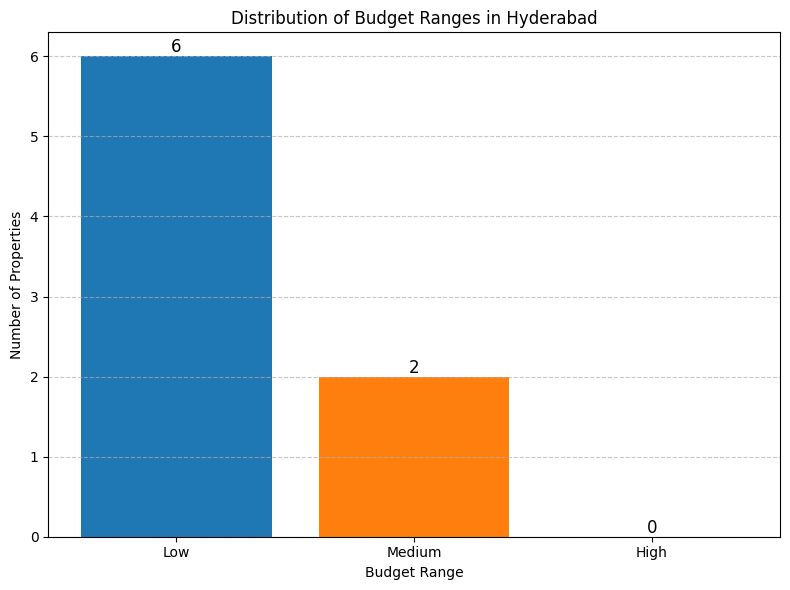

Saved bar_budget_nagpur.jpg to q1/bar_budget_nagpur.jpg


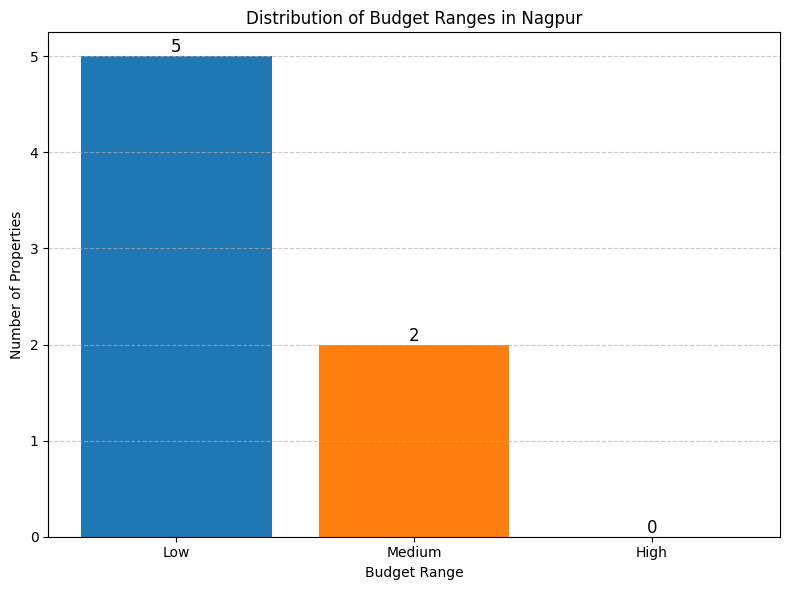

Saved bar_budget_all_cities.jpg to q1/bar_budget_all_cities.jpg


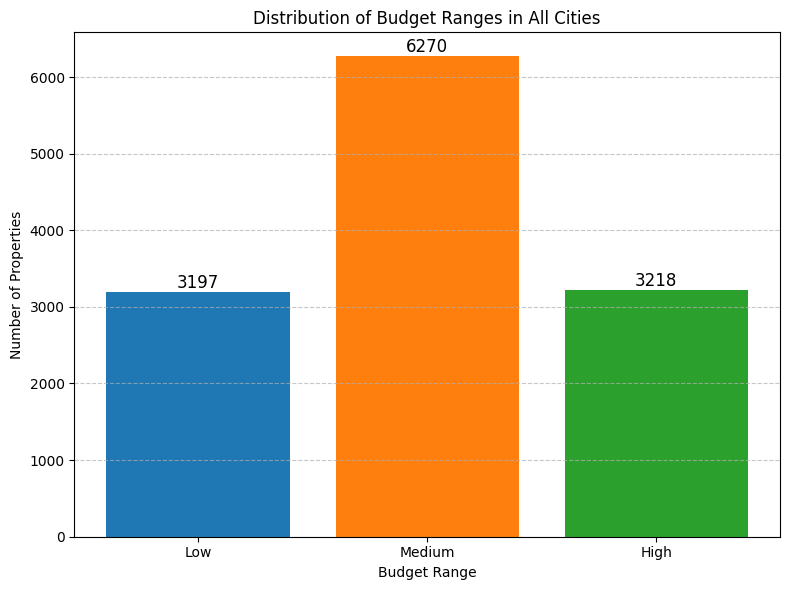

Saved stacked_bar_budget_by_city.jpg to q1/stacked_bar_budget_by_city.jpg


<Figure size 1200x600 with 0 Axes>

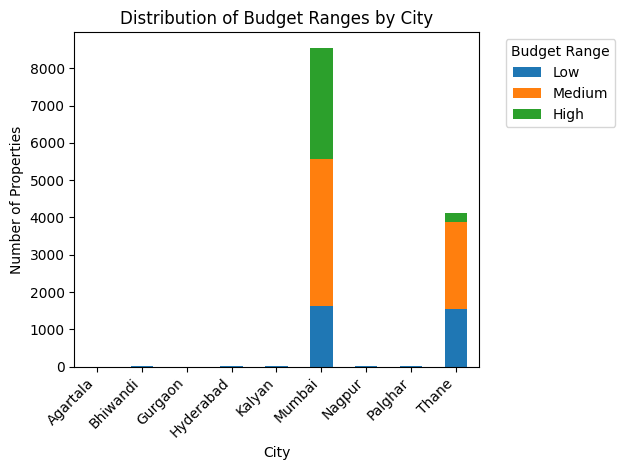

In [36]:
def plot_city_budget(city_data, city_name, question_num):
    """
    Note: Category ordering is random, hence the fixed ordering below.
    """
    all_categories = ['Low', 'Medium', 'High']
    budget_distribution = city_data['Budget_Category'].value_counts()
    budget_distribution = budget_distribution.reindex(all_categories, fill_value=0)
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(budget_distribution.index, budget_distribution.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Budget Range')
    plt.ylabel('Number of Properties')
    plt.title(f'Distribution of Budget Ranges in {city_name}')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=0)
    plt.tight_layout()
    save_to_question_dir(f'bar_budget_{city_name.lower().replace(" ", "_")}.jpg', question_num)
    plt.show()
    plt.close()

for city in data['City'].unique():
    city_data = data[data['City'] == city]
    plot_city_budget(city_data, city, 1)

plot_city_budget(data, 'All Cities', 1)

city_budget_data = data.groupby(['City', 'Budget_Category']).size().unstack(fill_value=0)
city_budget_data = city_budget_data.reindex(columns=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 6))
city_budget_data.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.title('Distribution of Budget Ranges by City')
plt.legend(title='Budget Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_to_question_dir('stacked_bar_budget_by_city.jpg', 1, bbox_inches='tight')
plt.show()
plt.close()